In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import cm
import copy

## Завдання 1

In [2]:
def pi_stationary_initial_distribution(P):
    evals, evecs = np.linalg.eig(P.T)
    evec1 = evecs[:,np.isclose(evals, 1)]

    evec1 = evec1[:,0]
    pi = evec1 / evec1.sum()
    pi = pi.real
    
    return pi

In [3]:
def define_D_intervals(P):
    D = np.zeros((len(P),len(P[0])+1))
    
    for i in range(len(D)):
        for j in range(len(D[0])):
            D[i][j] = sum([P[i][k] for k in range(j)])

    return D

In [4]:
def psi(E,D,u,i):
    x = 0
    
    for j in E:
        if j != E[-1]:
            if D[i][j] <= u < D[i][j+1]:
                x = x + j
        if j == E[-1]:
            if D[i][j] <= u <= D[i][j+1]:
                x = x + j

    return x

In [5]:
P = np.array([
    [0.5, 0.5, 0.0, 0.0, 0.0, 0.0],
    [0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.5, 0.3, 0.2, 0.0],
    [0.0, 0.0, 0.3, 0.0, 0.0, 0.7],
    [0.0, 0.0, 0.2, 0.0, 0.8, 0.0],
    [0.0, 0.0, 0.0, 0.7, 0.0, 0.3]
])

E = [i for i in range(len(P))]
D = define_D_intervals(P)

pi_real = pi_stationary_initial_distribution(P)
pi_real = [round(pi_real[i],4) for i in E]

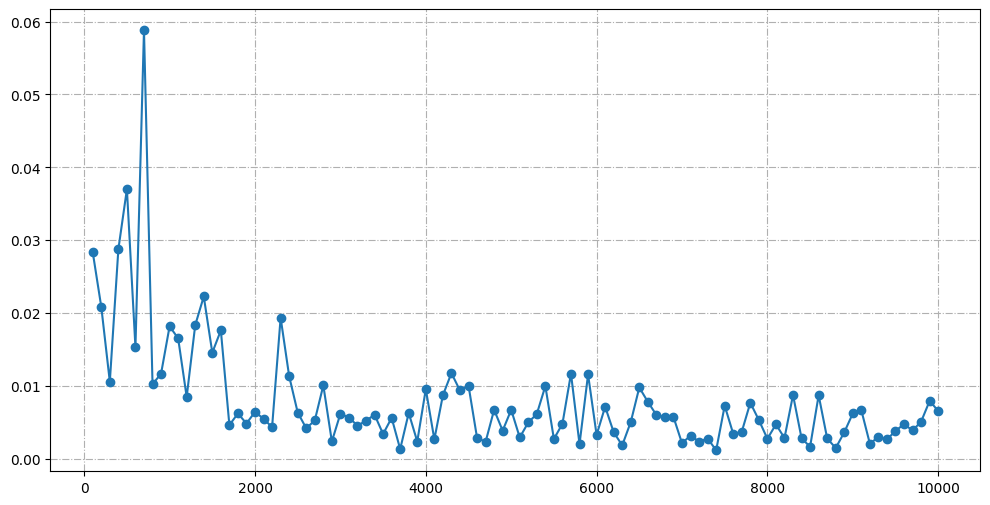

In [6]:
MAE = []

for N in range(100,10001,100):
    x = []

    x0 = random.randint(0,E[-1])
    x.append(x0)

    for i in range(N):
        u = random.uniform(0,1)
        offer = psi(E,D,u,x[-1])
        x.append(offer)

    pi_emperical = []
    for j in E:
        pi_emperical.append(x.count(j)/N)
    
    MAE.append(sum([abs(pi_emperical[j]-pi_real[j]) for j in E])/len(E))

plt.figure(figsize=(12,6))

plt.plot([i for i in range(100,10001,100)], MAE, "o-")
plt.grid(linestyle="-.")
plt.show()

## Завдання 2

In [7]:
def define_Q_approximation(M):
    Q = np.zeros((M,M))
    
    Q[0][0] = Q[0][1] = 1/2
    Q[-1][-2] = Q[-1][-1] = 1/2

    k = 0
    for i in range(1, len(Q)-1):
        Q[i][k] = Q[i][k+2] = 1/2
        k += 1

    return Q

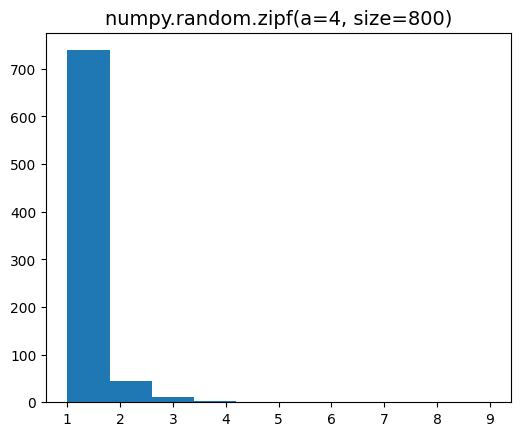

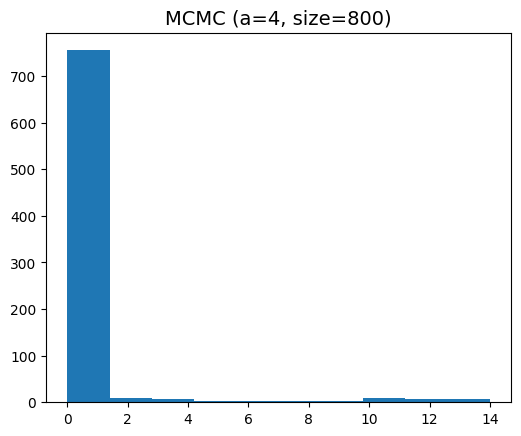

In [8]:
N = 800
M = 50
a = 4

E = [i for i in range(M)]
Q = define_Q_approximation(M)
D = define_D_intervals(Q)

x_real = np.random.zipf(a, size=N)

x_predicted = []

x0 = random.randint(0,M-1)
x_predicted.append(x0)

for i in range(N):
    u = random.uniform(0,1)
    offer = psi(E,D,u,x_predicted[-1])

    alpha = min(pow(x_predicted[-1]+1,a)/pow(offer+1,a), 1)

    v = random.uniform(0,1)
    if v <= alpha:
        x_predicted.append(offer)
    else:
        x_predicted.append(x_predicted[-1])

plt.figure(figsize=(6,4.8))
plt.hist(x_real)
plt.title("numpy.random.zipf(a=4, size=800)", font={"size":14})
plt.show()

plt.figure(figsize=(6,4.8))
plt.hist(x_predicted)
plt.title("MCMC (a=4, size=800)", font={"size":14})
plt.show()

## Завдання 3

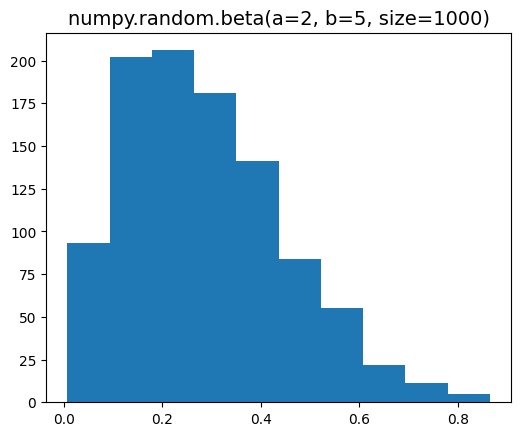

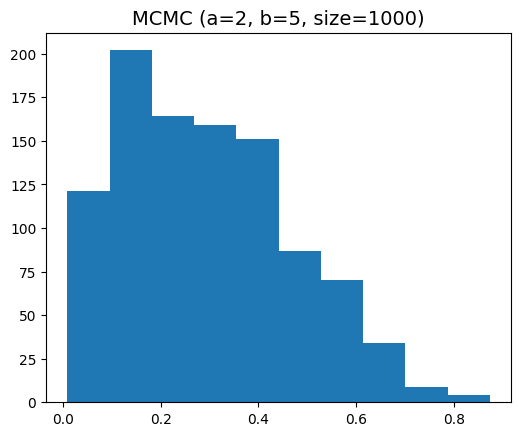

In [9]:
N = 1000

a = 2
b = 5

x_real = np.random.beta(a, b, size=N)

x_predicted = []

x0 = random.uniform(0,1)
x_predicted.append(x0)

for i in range(N):
    offer = random.uniform(0,1)

    alpha = min((pow(offer,a-1)*pow((1-offer),b-1))/(pow(x_predicted[-1],a-1)*pow((1-x_predicted[-1]),b-1)), 1)

    v = random.uniform(0,1)
    if v <= alpha:
        x_predicted.append(offer)
    else:
        x_predicted.append(x_predicted[-1])

plt.figure(figsize=(6,4.8))
plt.hist(x_real)
plt.title("numpy.random.beta(a=2, b=5, size=1000)", font={"size": 14})
plt.show()

plt.figure(figsize=(6,4.8))
plt.hist(x_predicted)
plt.title("MCMC (a=2, b=5, size=1000)", font={"size": 14})
plt.show()

## Завдання 4

In [10]:
def MCMC_Bayes_estimator(N,y,mu,sigma,tau,d):
    x = []

    x0 = np.random.normal(mu,tau**2)
    x.append(x0)

    for i in range(N):
        offer = x[-1] + np.random.normal(mu,d**2)

        numerator = np.exp(-pow(y-offer,2)/(2*sigma**2)) * np.exp(-pow(offer-mu,2)/(2*sigma**2))
        denominator = np.exp(-pow(y-x[-1],2)/(2*sigma**2)) * np.exp(-pow(x[-1]-mu,2)/(2*sigma**2))
        alpha = min(numerator/denominator, 1)

        v = random.uniform(0,1)
        if v <= alpha:
            x.append(offer)
        else:
            x.append(x[-1])

    return x

Mean: 1.46651714005372 variance: 0.531792976218335


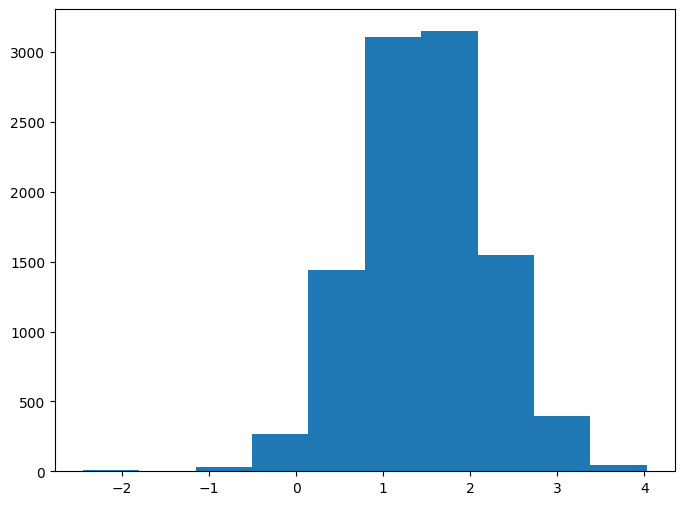

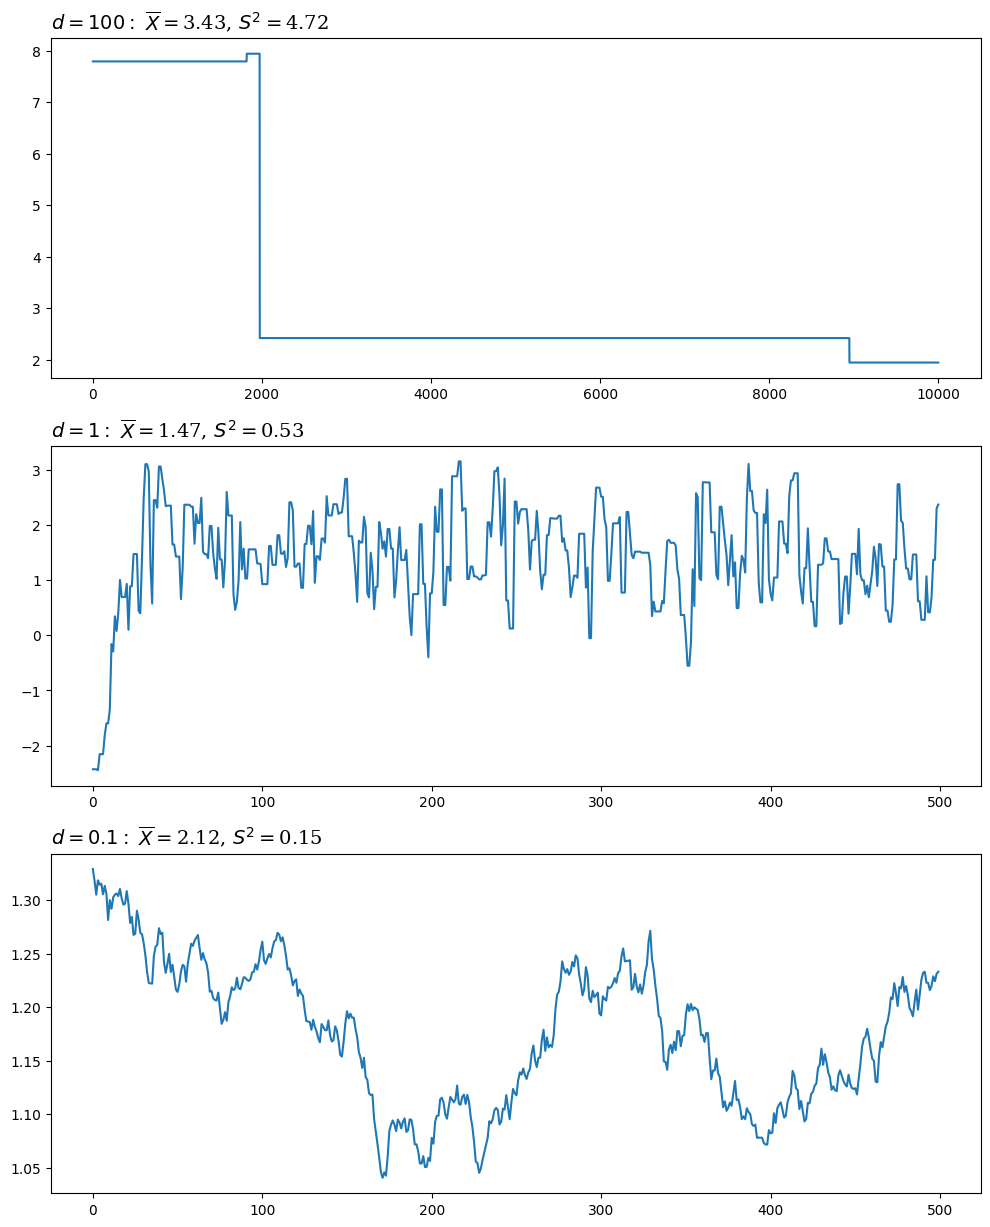

In [37]:
N = 10000
y = 3
mu = 0
sigma = 1
tau = 2

x1 = MCMC_Bayes_estimator(N,y,mu,sigma,tau,d=100)
x2 = MCMC_Bayes_estimator(N,y,mu,sigma,tau,d=1)
x3 = MCMC_Bayes_estimator(N,y,mu,sigma,tau,d=0.1)

print("Mean:", np.mean(x2), "variance:", np.var(x2))

plt.figure(figsize=(8,6))
plt.hist(x2)
plt.show()

plt.figure(figsize=(12,15))

plt.subplot(3,1,1)
plt.plot([i for i in range(10000)], x1[:10000])
title = r"$d=100:\ \overline{X}=$"+f"{round(np.mean(x1),2)},"+r"$\ S^2=$"+f"{round(np.var(x1),2)}"
plt.title(
    title,
    font={"family": "serif", "size": 14}, 
    loc = "left"
)

plt.subplot(3,1,2)
plt.plot([i for i in range(500)], x2[:500])
title = r"$d=1:\ \overline{X}=$"+f"{round(np.mean(x2),2)},"+r"$\ S^2=$"+f"{round(np.var(x2),2)}"
plt.title(
    title, 
    font={"family": "serif", "size": 14}, 
    loc = "left"
)

plt.subplot(3,1,3)
plt.plot([i for i in range(500)], x3[:500])
title = r"$d=0.1:\ \overline{X}=$"+f"{round(np.mean(x3),2)},"+r"$\ S^2=$"+f"{round(np.var(x3),2)}"
plt.title(
    title, 
    font={"family": "serif", "size": 14}, 
    loc = "left"
)

plt.show()

## Завдання 5

In [23]:
def display_graph(graph):
    font = {
    "family": "serif",
    "size": 14
    }

    x = [1,2,3,4,4,3,2,3,4,5]
    y = [1,1,1,1,2,2,2,3,3,3]

    plt.plot(
        [x[0],x[1],x[2],x[3],x[4],x[5],x[1],x[5],x[6],x[5],x[8],x[7],x[8],x[4],x[9]], 
        [y[0],y[1],y[2],y[3],y[4],y[5],y[1],y[5],y[6],y[5],y[8],y[7],y[8],y[4],y[9]],
        marker = 'o', ms = 25, mec = 'black', mew=2, mfc = 'white', color = 'black'
    )

    for i in range(10):
        plt.plot(
            [x[i]], 
            [y[i]],
            marker = "o", ms = 25, mec = "black", mew=2, linestyle="None", mfc = graph[i+1][0], color = "black"
        )

    i = 0
    for x,y in zip(x,y):
        # index = "{" + f"{str(i)}" + "}"
        label = f"${i+1}$"

        plt.annotate(label, # this is the text
            (x,y), # these are the coordinates to position the label
            textcoords="offset points", # how to position the text
            xytext=(0,-1.5), # distance from text to points (x,y)
            ha='center', # horizontal alignment can be left, right or center
            va="center", # vertical alignment can be bottom, top or center
            font = font,
        )
        i += 1

    plt.axis("off")
    plt.axis("equal")
    
    return plt.plot()

In [24]:
def S(graph,point,colors):
    point_neighbors = point[1]

    neighbor_colors = []
    for i in point_neighbors:
        neighbor_colors.append(graph[i][0])

    neighbor_colors = list(set(neighbor_colors))
    
    S = [colors[i] for i in range(3) if colors[i] not in neighbor_colors]

    if point[0] not in S:
        S.append(point[0])

    return S

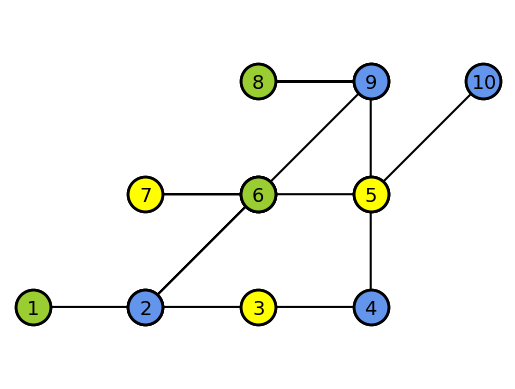

In [25]:
graph = {
    1: ["yellowgreen", [2]],
    2: ["cornflowerblue", [1,3]],
    3: ["yellow", [2,4]],
    4: ["cornflowerblue", [3,5]],
    5: ["yellow", [4,6,9,10]],
    6: ["yellowgreen", [2,5,7,9]],
    7: ["yellow", [6]],
    8: ["yellowgreen", [9]],
    9: ["cornflowerblue", [5,6,8]],
    10: ["cornflowerblue", [5]]
}

display_graph(graph)
plt.savefig("task 5.1.png", dpi=500)
plt.show()

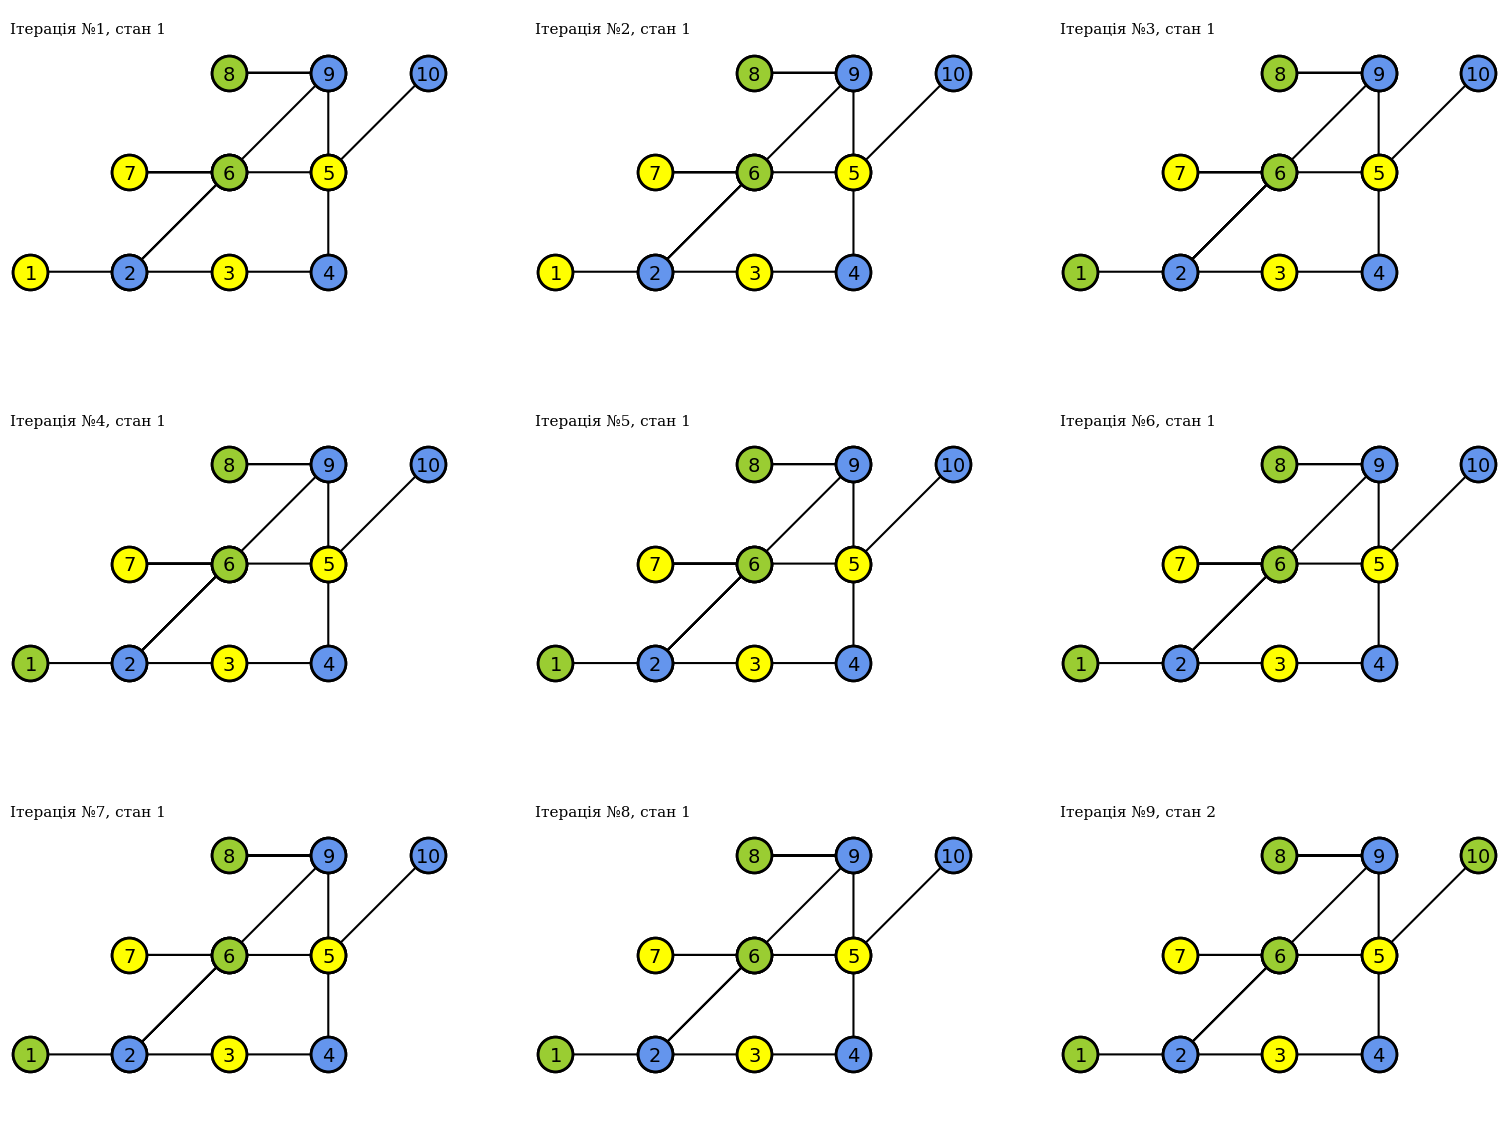

E = [0, 1, 2]


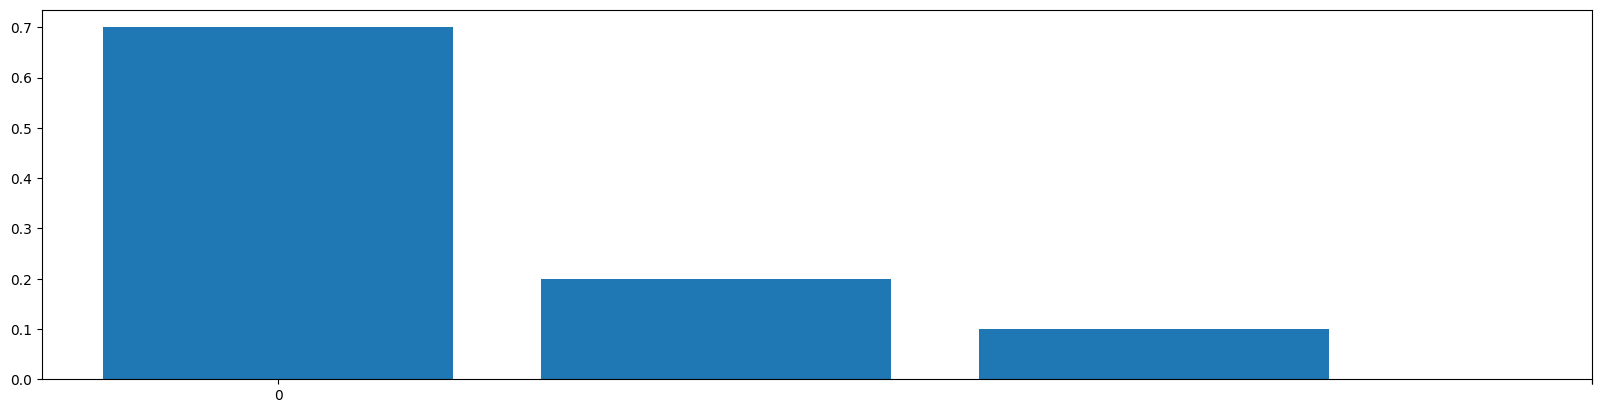

In [26]:
N = 9

graph = {
    1: ["yellowgreen", [2]],
    2: ["cornflowerblue", [1,3]],
    3: ["yellow", [2,4]],
    4: ["cornflowerblue", [3,5]],
    5: ["yellow", [4,6,9,10]],
    6: ["yellowgreen", [2,5,7,9]],
    7: ["yellow", [6]],
    8: ["yellowgreen", [9]],
    9: ["cornflowerblue", [5,6,8]],
    10: ["cornflowerblue", [5]]
}

plt.figure(figsize=(6.4*3,4.8*3))

E = 0
states = [[graph,E]]
colors = ["yellowgreen", "cornflowerblue", "yellow"]

for n in range(N):
    i = random.randint(1,10)

    graph = copy.deepcopy(states[-1][0])
    graph[i][0] = random.choice(S(graph,graph[i],colors))

    previous_graphs = [states[k][0] for k in range(n)]
    previous_graphs.append(states[-1][0])

    previous_states = [states[k][1] for k in range(n)]
    previous_states.append(states[-1][1])

    if graph in previous_graphs:
        states.append([
            copy.deepcopy(graph),
            [previous_states[k] for k in range(len(previous_graphs)) if graph == previous_graphs[k]][0]
        ])
    if graph not in previous_graphs:
        E += 1    
        states.append([copy.deepcopy(graph),E])

    plt.subplot(3,3,n+1)
    plt.title(r"Ітерація №"+f"{n+1}, стан {E}", font={"family": "serif", "size": 11}, loc="left", y=0.9)
    display_graph(graph)

plt.savefig("task 5.2.png", dpi=800)
plt.show()

print(f"E = {[i for i in range(E+1)]}")

plt.figure(figsize=(20,4.8))

plt.bar(
    [f"{i}" for i in range(E+1)],
    [[states[i][1] for i in range(N+1)].count(j)/(N+1) for j in range(E+1)],
)

plt.xticks([f"{i}" if i%5 == 0 else "" for i in range(E+1)])

plt.savefig("task 5.3.png", dpi=500)
plt.show()

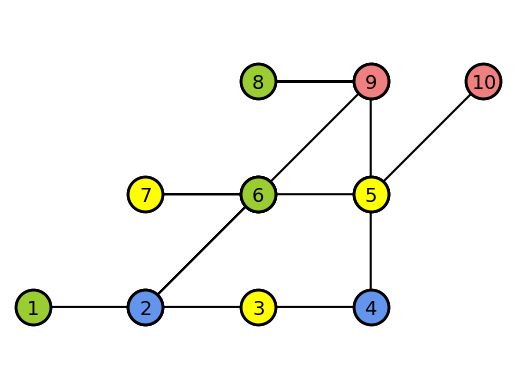

In [27]:
graph = {
    1: ["yellowgreen", [2]],
    2: ["cornflowerblue", [1,3]],
    3: ["yellow", [2,4]],
    4: ["cornflowerblue", [3,5]],
    5: ["yellow", [4,6,9,10]],
    6: ["yellowgreen", [2,5,7,9]],
    7: ["yellow", [6]],
    8: ["yellowgreen", [9]],
    9: ["lightcoral", [5,6,8]],
    10: ["lightcoral", [5]]
}

display_graph(graph)
plt.savefig("task 5.4.png", dpi=500)
plt.show()

E = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144]


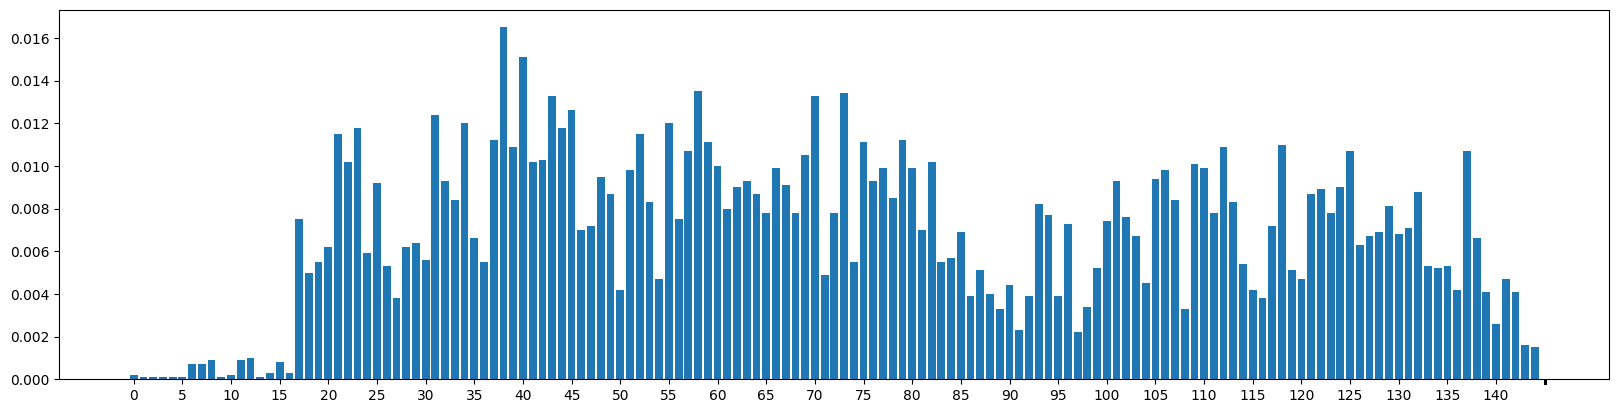

In [33]:
N = 10000

graph = {
    1: ["yellowgreen", [2]],
    2: ["cornflowerblue", [1,3]],
    3: ["yellow", [2,4]],
    4: ["cornflowerblue", [3,5]],
    5: ["yellow", [4,6,9,10]],
    6: ["yellowgreen", [2,5,7,9]],
    7: ["yellow", [6]],
    8: ["yellowgreen", [9]],
    9: ["lightcoral", [5,6,8]],
    10: ["lightcoral", [5]]
}

# plt.figure(figsize=(6.4*3,4.8*3))

E = 0
states = [[graph,E]]
colors = ["yellowgreen", "cornflowerblue", "yellow", "lightcoral"]

for n in range(N):
    i = random.randint(1,10)

    graph = copy.deepcopy(states[-1][0])
    graph[i][0] = random.choice(S(graph,graph[i],colors))

    previous_graphs = [states[k][0] for k in range(n)]
    previous_graphs.append(states[-1][0])

    previous_states = [states[k][1] for k in range(n)]
    previous_states.append(states[-1][1])

    if graph in previous_graphs:
        states.append([
            copy.deepcopy(graph),
            [previous_states[k] for k in range(len(previous_graphs)) if graph == previous_graphs[k]][0]
        ])
    if graph not in previous_graphs:
        E += 1    
        states.append([copy.deepcopy(graph),E])

    # plt.subplot(3,3,n+1)
    # plt.title(r"Ітерація №"+f"{n+1}, стан {E}", font={"family": "serif", "size": 11}, loc="left", y=0.9)
    # display_graph(graph)

# plt.savefig("task 5.5.png", dpi=800)
# plt.show()

print(f"E = {[i for i in range(E+1)]}")

plt.figure(figsize=(20,4.8))

plt.bar(
    [f"{i}" for i in range(E+1)],
    [[states[i][1] for i in range(N+1)].count(j)/(N+1) for j in range(E+1)],
)

plt.xticks([f"{i}" if i%5 == 0 else "" for i in range(E+1)])

plt.savefig("task 5.6.png", dpi=500)
plt.show()

## Завдання 6

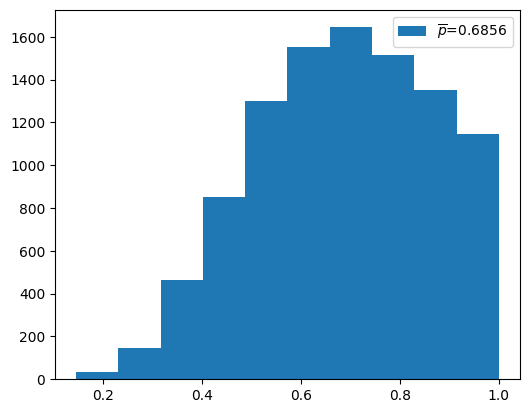

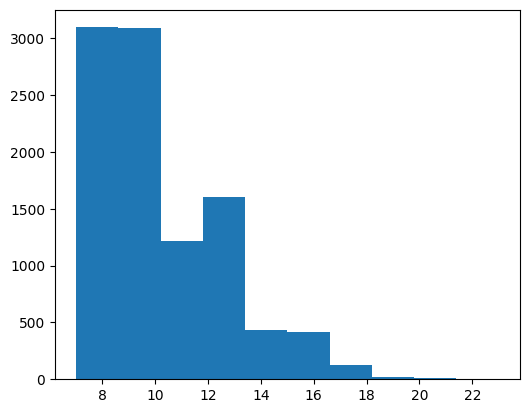

In [4]:
Lambda = 10
a = b = 1
x = 7

N = 10000

p, n = [], [8]
for i in range(N):
    p.append(np.random.beta(x+a,n[-1]-x+b))
    n.append(x + np.random.poisson(Lambda*(1-p[-1])))

plt.figure(figsize=(6,4.8))
plt.hist(p)
plt.legend([r"$\overline{p}$="+f"{round(np.mean(p),4)}"])
# plt.title(r"Гістограма значень $p$", font={"family": "serif", "size": 14})
plt.show()

plt.figure(figsize=(6,4.8))
plt.hist(n)
# plt.title(r"Гістограма значень $n$", font={"family": "serif", "size": 14})
plt.show()

## Завдання 7

In [7]:
def display_3d_histigram(x_input,y_input,ax,title):
    x = np.array(x_input)         #turn x,y data into numpy arrays
    y = np.array(y_input)

    #make histogram stuff - set bins - I choose 20x20 because I have a lot of data
    hist, xedges, yedges = np.histogram2d(x, y, bins=(25,25))
    xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])

    xpos = xpos.flatten()/2.
    ypos = ypos.flatten()/2.
    zpos = np.zeros_like (xpos)

    dx = xedges [1] - xedges [0]
    dy = yedges [1] - yedges [0]
    dz = hist.flatten()

    cmap = cm.get_cmap('jet') # Get desired colormap - you can change this!
    max_height = np.max(dz)   # get range of colorbars so we can normalize
    min_height = np.min(dz)
    # scale each z to [0,1], and get their rgb values
    rgba = [cmap((k-min_height)/max_height) for k in dz] 

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
    # plt.title(title)
    plt.xlabel("Вісь X")
    plt.ylabel("Вісь Y")

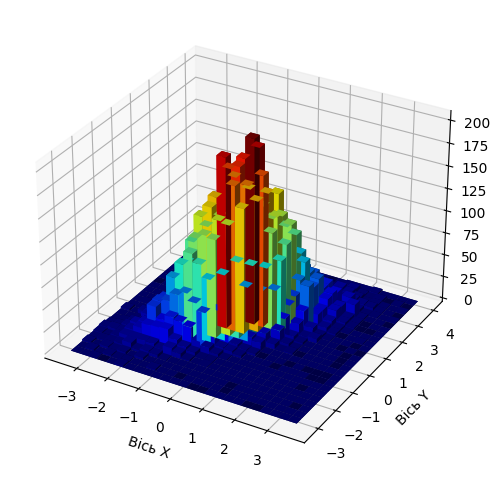

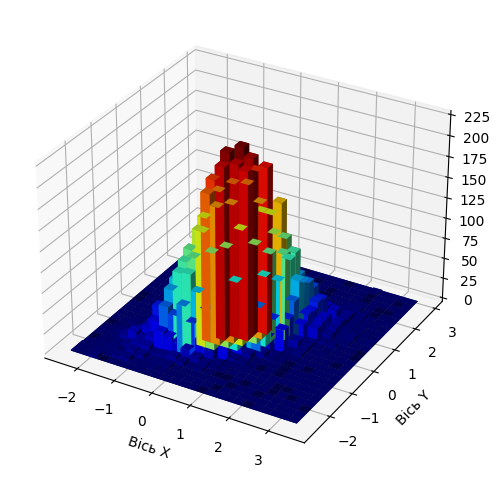

In [12]:
p = 0.7
N = 10000

x_real, y_real = np.random.multivariate_normal(mean=[0,0], cov=[[1,p],[p,1]], size=N).T

x0, y0 = 0.05, 0.05
x, y = [x0], [y0]

for i in range(N):
    x.append(np.random.normal(p*y[-1],1-p**2))
    y.append(np.random.normal(p*x[-1],1-p**2))

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
display_3d_histigram(x_real, y_real, ax, title="Згенерований програмою розоділ")
plt.savefig("task 7.1.png", dpi=300)
plt.show()

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
display_3d_histigram(x, y, ax, title="Згенерований власноруч розподіл")
plt.savefig("task 7.2.png", dpi=300)
plt.show()

## Завдання 8

In [43]:
def table_degree(T):
    checkerboard_forward = [
    [1,0],
    [0,1]
    ]

    checkerboard_backward = [
        [0,1],
        [1,0]
    ]

    checkerboard = [checkerboard_forward, checkerboard_backward]

    d = 0
    for u in range(len(T)):
        for v in range(u+1,len(T)):
            for i in range(len(T[0])):
                for j in range(i+1,len(T[0])):
                    current = [
                        [T[u][i], T[u][j]],
                        [T[v][i], T[v][j]]
                    ]

                    if current in checkerboard:
                        d += 1

    return d

In [44]:
def MCMC_without_alpha(checkerboard,tables,E,N):
    for n in range(N):
        T = copy.deepcopy(tables[-1][0])

        indexes = [k for k in range(len(T))]
        u = random.choice(indexes)
        indexes.remove(u)
        v = random.choice(indexes)

        indexes = [k for k in range(len(T[0]))]
        i = random.choice(indexes)
        indexes.remove(i)
        j = random.choice(indexes)

        current = [
            [T[min(u,v)][min(i,j)], T[min(u,v)][max(i,j)]],
            [T[max(u,v)][min(i,j)], T[max(u,v)][max(i,j)]]
        ]

        if current == checkerboard[0]:
            T[min(u,v)][min(i,j)], T[min(u,v)][max(i,j)], T[max(u,v)][min(i,j)], T[max(u,v)][max(i,j)] = 0,1,1,0

            previous_tables = [tables[k][0] for k in range(n)]
            previous_tables.append(tables[-1][0])

            previous_states = [tables[k][1] for k in range(n)]
            previous_states.append(tables[-1][1])

            if T in previous_tables:
                tables.append([
                    T,
                    [previous_states[k] for k in range(len(previous_states)) if T == previous_tables[k]][0]
                ])
            if T not in previous_tables:
                E += 1
                tables.append([copy.deepcopy(T),E])

        elif current == checkerboard[1]:
            T[min(u,v)][min(i,j)], T[min(u,v)][max(i,j)], T[max(u,v)][min(i,j)], T[max(u,v)][max(i,j)] = 1,0,0,1
            
            previous_tables = [tables[k][0] for k in range(n)]
            previous_tables.append(tables[-1][0])

            previous_states = [tables[k][1] for k in range(n)]
            previous_states.append(tables[-1][1])

            if T in previous_tables:
                tables.append([
                    T,
                    [previous_states[k] for k in range(len(previous_states)) if T == previous_tables[k]][0]
                ])
            if T not in previous_tables:
                E += 1
                tables.append([copy.deepcopy(T),E])
        else:
            tables.append([T,E])

    print(f"E = {[i for i in range(E+1)]}")

    plt.figure(figsize=(10,4.8))
    plt.bar(
        [f"{i}" for i in range(E+1)],
        [[states[i][1] for i in range(N+1)].count(j)/(N+1) for j in range(E+1)],
    )
    plt.show()

In [49]:
def MCMC_with_alpha(checkerboard,tables,E,N):
    for n in range(N):
        T = copy.deepcopy(tables[-1][0])

        while True:
            indexes = [k for k in range(len(T))]
            u = random.choice(indexes)
            indexes.remove(u)
            v = random.choice(indexes)

            indexes = [k for k in range(len(T[0]))]
            i = random.choice(indexes)
            indexes.remove(i)
            j = random.choice(indexes)

            current = [
                [T[min(u,v)][min(i,j)], T[min(u,v)][max(i,j)]],
                [T[max(u,v)][min(i,j)], T[max(u,v)][max(i,j)]]
            ]

            if current in checkerboard:
                break

        if current == checkerboard[0]:
            T[min(u,v)][min(i,j)], T[min(u,v)][max(i,j)], T[max(u,v)][min(i,j)], T[max(u,v)][max(i,j)] = 0,1,1,0

            alpha = min(table_degree(tables[-1][0])/table_degree(T), 1)

            u = random.uniform(0,1)

            if u <= alpha:
                previous_tables = [tables[k][0] for k in range(n)]
                previous_tables.append(tables[-1][0])

                previous_states = [tables[k][1] for k in range(n)]
                previous_states.append(tables[-1][1])

                if T in previous_tables:
                    tables.append([
                        copy.deepcopy(T),
                        [previous_states[k] for k in range(len(previous_states)) if T == previous_tables[k]][0]
                    ])
                if T not in previous_tables:
                    E += 1
                    tables.append([copy.deepcopy(T),E])
            else:
                tables.append(tables[-1])

        elif current == checkerboard[1]:
            T[min(u,v)][min(i,j)], T[min(u,v)][max(i,j)], T[max(u,v)][min(i,j)], T[max(u,v)][max(i,j)] = 1,0,0,1
            
            alpha = min(table_degree(tables[-1][0])/table_degree(T), 1)

            u = random.uniform(0,1)

            if u <= alpha:
                previous_tables = [tables[k][0] for k in range(n)]
                previous_tables.append(tables[-1][0])

                previous_states = [tables[k][1] for k in range(n)]
                previous_states.append(tables[-1][1])

                if T in previous_tables:
                    tables.append([
                        T,
                        [previous_states[k] for k in range(len(previous_states)) if T == previous_tables[k]][0]
                    ])
                if T not in previous_tables:
                    E += 1
                    tables.append([T,E])
            else:
                tables.append(tables[-1])

    print(f"E = {[i for i in range(E+1)]}")

    plt.figure(figsize=(10,4.8))
    plt.bar(
        [f"{i}" for i in range(E+1)],
        [[states[i][1] for i in range(N+1)].count(j)/(N+1) for j in range(E+1)],
    )
    plt.show()

In [46]:
# T = np.array([
#     [1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1],
#     [1,1,1,1,1, 1,1,1,1,1, 1,0,0,1,0, 1,1],
#     [1,1,1,1,1, 1,1,1,1,1, 1,1,1,0,1, 0,0],
#     [1,1,1,1,1, 1,1,1,1,1, 1,1,1,0,0, 0,0],
#     [1,0,1,1,1, 1,1,1,1,1, 1,1,1,0,0, 0,0],
    
#     [1,1,1,1,1, 1,1,1,1,1, 1,0,0,0,0, 0,0],
#     [1,1,1,1,1, 0,1,1,0,0, 0,0,0,1,0, 1,1],
#     [1,1,1,1,1, 1,0,1,1,1, 1,0,0,0,0, 0,0],
#     [1,1,1,1,1, 1,1,1,1,1, 0,0,0,0,0, 0,0],
#     [1,1,1,1,0, 1,1,0,0,0, 0,0,0,0,0, 0,0],

#     [0,0,0,0,0, 0,0,0,0,0, 0,0,0,1,1, 0,0],
#     [1,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0],
#     [0,0,0,0,1, 0,0,0,0,0, 0,0,0,0,0, 0,0],
# ])

E = [0, 1, 2, 3, 4, 5, 6, 7]


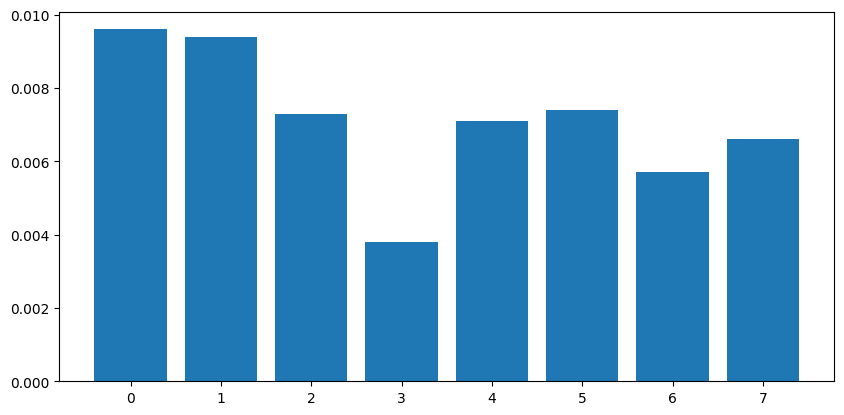

In [47]:
T = [[1,1,1,0],
     [1,1,0,0],
     [0,0,0,1]]

checkerboard_forward = [[1,0],[0,1]]
checkerboard_backward = [[0,1],[1,0]]
checkerboard = [checkerboard_forward, checkerboard_backward]

E = 0
tables = [[T,E]]

N = 10000

MCMC_without_alpha(checkerboard,tables,E,N)

E = [0, 1, 2, 3, 4, 5, 6, 7]


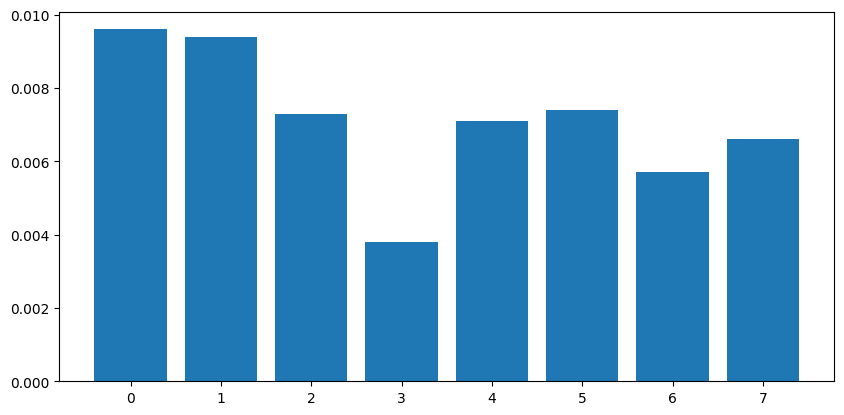

In [50]:
T = [[1,1,1,0],
     [1,1,0,0],
     [0,0,0,1]]

checkerboard_forward = [[1,0],[0,1]]
checkerboard_backward = [[0,1],[1,0]]
checkerboard = [checkerboard_forward, checkerboard_backward]

E = 0
tables = [[T,E]]

N = 10000

MCMC_with_alpha(checkerboard,tables,E,N)